In [1]:
import sys
import os

# Add the src directory to the sys.path
sys.path.append(os.path.abspath('../src'))

from linear import Linear
from loss import MSELoss
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# params for data 
# 1000 samples, each containing 3 features (input_dim)
# the output 'y' will be 1000 samples with 2 (output_dim) 
samples = 1000 
input_dim = 3
output_dim = 2

# generate data (set seed too for reproductibility)
# data -> (1000,3)
np.random.seed(0)
data = np.random.randn(samples, input_dim)

# generate weights and biases
# these are the target weights and biases that we are trying to recreate in the linear model
# they are the ground truth variables
weights = np.random.randn(input_dim, output_dim)
bias = np.random.randn(output_dim)

# calculation of the output
# y -> (1000,2)
y = data @ weights + bias

In [3]:
# init of the model and loss module
model = Linear(input_dim=input_dim, output_dim=output_dim)
loss_function = MSELoss()

Epoch 0: loss=14594.734801311377
Epoch 20: loss=6800.791106800178
Epoch 40: loss=3178.004722300175
Epoch 60: loss=1489.1543121305083
Epoch 80: loss=699.6311446731968
Epoch 100: loss=329.52919662631683
Epoch 120: loss=155.58322639812246
Epoch 140: loss=73.62461544379127
Epoch 160: loss=34.9157391893958
Epoch 180: loss=16.592195644654183
Epoch 200: loss=7.899833138283434
Epoch 220: loss=3.768005158820144
Epoch 240: loss=1.8002554100669061
Epoch 260: loss=0.8614641343662881
Epoch 280: loss=0.4128327828554552


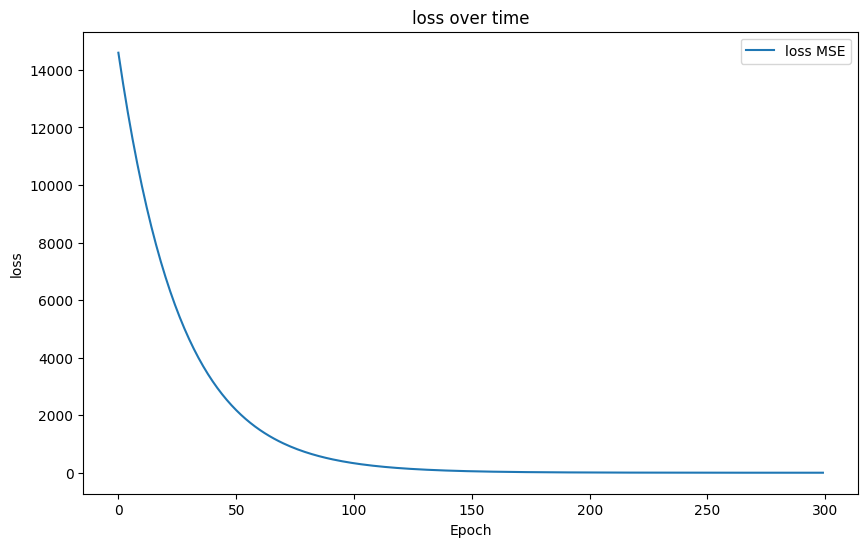

In [4]:
learning_r = 0.01 # the larger the learning rate 
max_epoch = 300
log_loss = []

for epoch in range(max_epoch):
    # forward pass in the model to get predictions
    yhat = model.forward(data)

    # calculate the loss using MSE
    loss = loss_function.forward(y, yhat)

    # backpropagate the MSE loss in the network
    loss_gradient = loss_function.backward(y, yhat)

    # update the weight gradients before updating 
    model.backward_update_gradient(data, loss_gradient)

    # update the weights and biases
    model.update_parameters(learning_rate=learning_r)

    # save the loss to monitor later
    log_loss.append(loss.mean())

    if epoch % 20 == 0:
        print(f'Epoch {epoch}: loss={loss.mean()}')

# Plot the loss
plt.figure(figsize=(10, 6))
plt.plot(log_loss, label='loss MSE')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('loss over time')
plt.legend()
plt.show()